<a href="https://colab.research.google.com/github/frankfurtmacmoses/statistics_for_big_data_assignments/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"frankfurt","key":"0486f407b3ce3583f098ac48742f1872"}'}

In [57]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [58]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 61.6MB/s]


In [59]:
!ls /content

 drive						  'kaggle (1).json'   sample_data
 house-prices-advanced-regression-techniques.zip   kaggle.json


In [7]:
!pwd

/content


In [16]:
!mkdir /content/drive/MyDrive/kaggle_data


mkdir: cannot create directory ‘/content/drive/MyDrive/kaggle_data’: File exists


In [17]:
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/drive/MyDrive/kaggle_data/

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace /content/drive/MyDrive/kaggle_data/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [96]:

!ls /content/drive/MyDrive/kaggle_data/

data_description.txt  sample_submission.csv  test.csv  train.csv


In [97]:
import pandas as pd

# Read the train.csv data

train_source = pd.read_csv('/content/drive/MyDrive/kaggle_data/train.csv')
size = train_source.size
#dim = test_source.shape
info = train_source.info
print(f"Number of rows in this dataset is: {size}",sep="")
print(f"Below is the dataset information: {info}",sep="")


Number of rows in this dataset is: 118260
Below is the dataset information: <bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20 

In [98]:
col_list = train_source.columns

train_sorted = train_source.sort_values(by=list(col_list),  ascending=True)


In [99]:
col_lotarea = train_sorted['LotArea']
#col_lotarea.head(5)



In [63]:
from numpy import percentile

data_min,data_mean, data_median, data_max = col_lotarea.min(),col_lotarea.mean,col_lotarea.median,col_lotarea.max()

my_quartiles = percentile(col_lotarea,[25,50,75])

print(f'min: {data_min}')
print(f'Q1: {my_quartiles[0]}')
print(f'median: {my_quartiles[1]}')
print(f'Q3: {my_quartiles[2]}')
print(f'max: {data_max}')

IQR  = my_quartiles[2] - my_quartiles[0]

lower_range = my_quartiles[0] - (1.5 * IQR)
upper_range = my_quartiles[2] + (1.5 * IQR)

print(f'IQR: {IQR}')
print(f'lower_range: {lower_range}')
print(f'upper_range: {upper_range}')





min: 1300
Q1: 7553.5
median: 9478.5
Q3: 11601.5
max: 215245
IQR: 4048.0
lower_range: 1481.5
upper_range: 17673.5


In [100]:
## filtering out outliers from the "LotArea" column of the dataset:

outliers = train_sorted[(train_sorted["LotArea"] < lower_range) | (train_sorted["LotArea"] > upper_range)]

print(f'These are all my outliers points: {outliers["LotArea"]}')
lot_area_series = outliers['LotArea']
lot_area_series.head(4)


These are all my outliers points: 53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64


,LotArea
53,50271
66,19900
113,21000
120,21453


In [101]:
%%capture
!python -m pip install plotnine


In [113]:
from plotnine import ggplot, aes, geom_line,geom_boxplot,ggtitle,geom_point,geom_density
## Convert outliers points to dataframe
outlier_points = lot_area_series.to_frame()

# Dataset without outliers
no_outlier_house_data = train_sorted[~train_sorted['LotArea'].isin(outlier_points['LotArea'])]
no_outlier_house_data_count = no_outlier_house_data.size

print(f'Number of records withoug outliers (original) {no_outlier_house_data_count}')


Number of records withoug outliers (original) 114062


<ipython-input-114-ab140da6a68c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


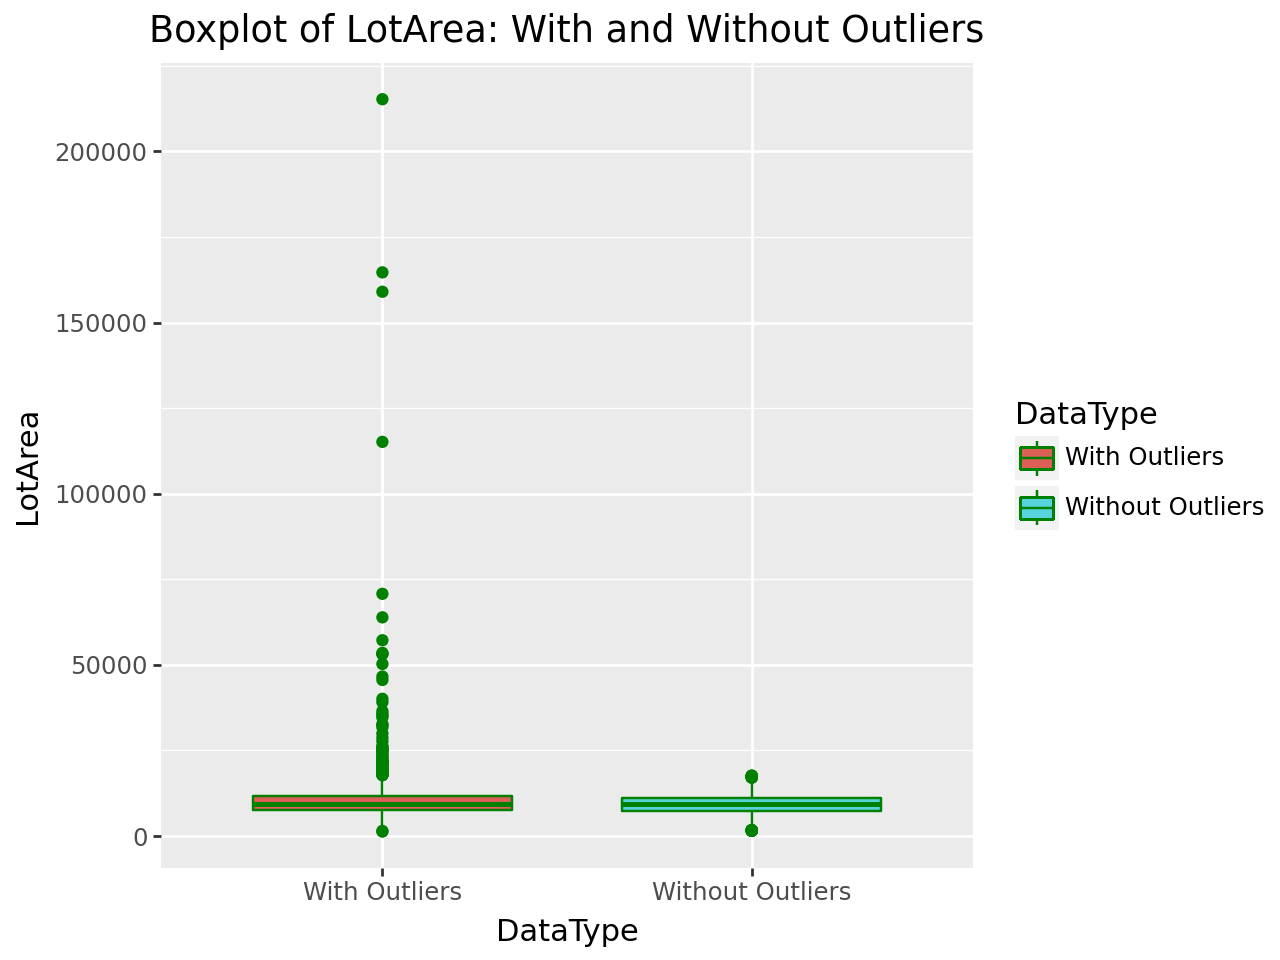

In [114]:
train_sorted['DataType'] = 'With Outliers'
no_outlier_house_data['DataType'] = 'Without Outliers'

# Combine both datasets
combined_data = pd.concat([train_sorted, no_outlier_house_data])

# Create side-by-side boxplots
plot = (ggplot(combined_data, aes(x='DataType', y='LotArea', fill='DataType')) +
        geom_boxplot(color='green', width=0.7) +
        ggtitle('Boxplot of LotArea: With and Without Outliers'))

plot.show()

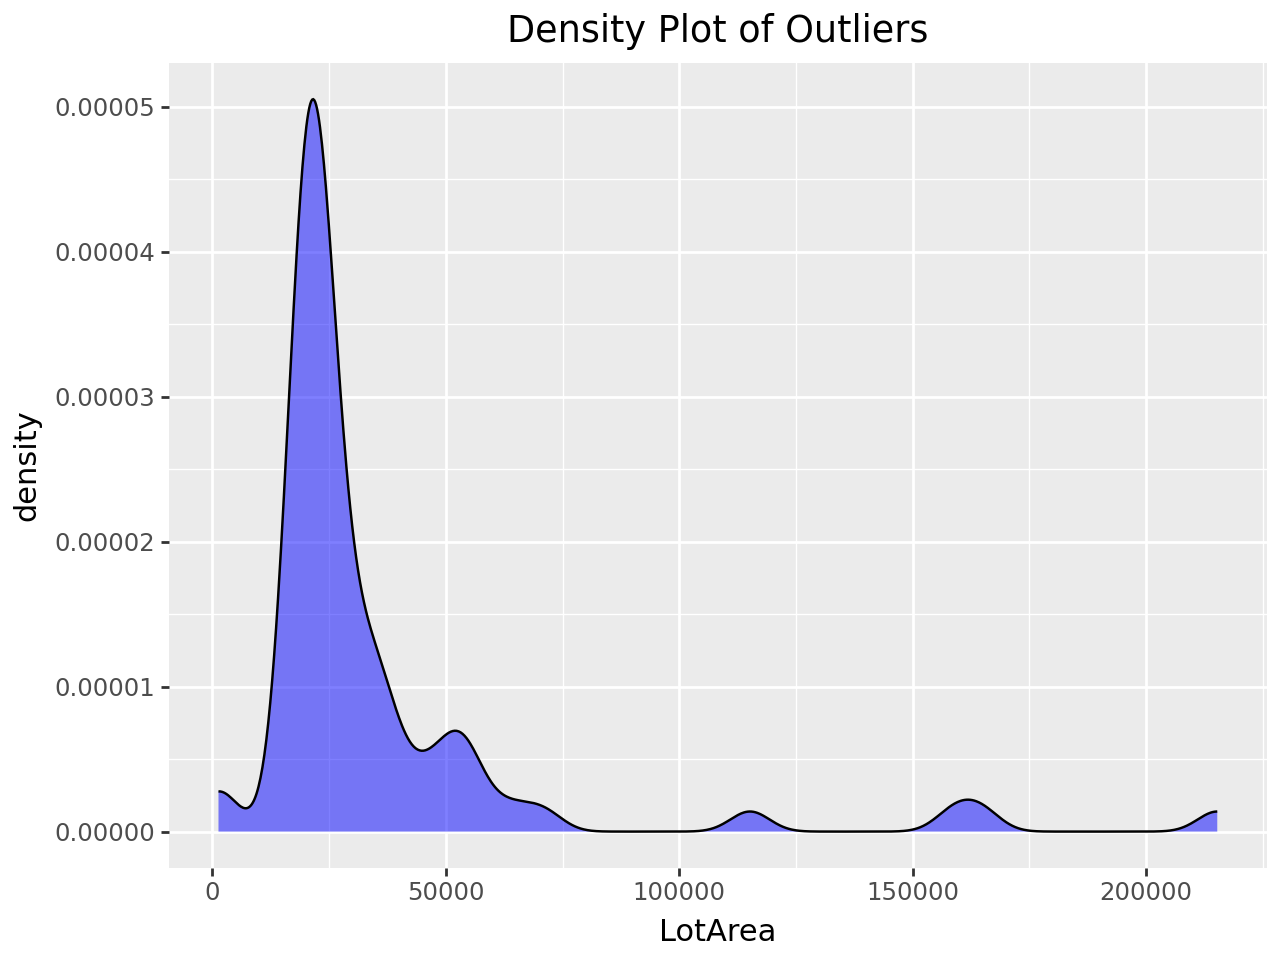

In [103]:
plot = (ggplot(outlier_points, aes(x='LotArea')) +
        geom_density(fill='blue', alpha=0.5) +
        ggtitle('Density Plot of Outliers')
       )

plot.show()

The outliers is skewed towards the minimum value and Q1. The data has a lot of outliers which can affect the result.